## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.linalg import solve
from scipy.interpolate import CubicSpline

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

In [4]:
2/3

0.6666666666666666

2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [5]:
def getUniformInt(C,N):
    xn = np.linspace(-1,1,N)
    return np.sum(np.polyval(C,xn))*2/N

In [6]:
def getUniformInt(func, a, b, eps):
    N=2
    dx=(b-a)/(N-1)/2
    x=np.linspace(a+dx,b-dx,N-1)
    I=(b-a)/(N-1)*np.sum(func(x))
    err=float("inf")
    while (err>eps):
        I_0=I
        N*=2
        dx=(b-a)/(N-1)/2
        x=np.linspace(a+dx,b-dx,N-1)
        I=(b-a)/(N-1)*np.sum(func(x))
        err=np.abs(I-I_0)
    return (I,N)

In [7]:
def func(x):
    return 7*x**3-8*x**2-3*x+3

In [8]:
getUniformInt(func, a = -1, b = 1, eps = 10**(-10))

(0.6666666666860691, 524288)

3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [9]:
def getPloyInt(C, N):
    xn, wn = special.roots_legendre(N)
    return np.sum(wn * np.polyval(C, xn))

In [10]:
C = [7, -8, -3, 3]

In [11]:
for i in range(1,7):
    print('Для N = ',i)
    print(getPloyInt(C, i))

Для N =  1
6.0
Для N =  2
0.6666666666666665
Для N =  3
0.6666666666666634
Для N =  4
0.6666666666666667
Для N =  5
0.6666666666666683
Для N =  6
0.6666666666666696


Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

Видно, что уже для N=2 второй метод дает результат отличающийся с истинным в 16 знаке после запятой, когда для вычисления с точностью до 10 знака первому методу понадобилось порядка 500 тысяч иттераций

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

In [12]:
getUniformInt(func, a = 0, b = 10, eps = 10**(-10))

(14713.333333333288, 16777216)

Точное значение 14713.(3)

Или можно сделать замену перменнной y=10x, тогда пределы заменятся на 0 и 1, после чего можно использовать сдвинутые полиномы Лежандра

$$
\int_{0}^{1} (7000y^3 - 800 y^2 - 30 y + 3) *10* dy 
$$

In [13]:
def getPloyShInt(C, N):
    xn, wn = special.roots_sh_legendre(N)
    return np.sum(wn * np.polyval(C, xn))

In [14]:
C_1=[70000,-8000,-300,30]

In [15]:
for i in range(1,7):
    print('Для N = ',i)
    print(getPloyShInt(C_1, i))

Для N =  1
6630.0
Для N =  2
14713.333333333334
Для N =  3
14713.333333333336
Для N =  4
14713.33333333333
Для N =  5
14713.333333333332
Для N =  6
14713.333333333332


Compare the result with the exact value of the integral.

Видно, что для N=2 отличие от истинного значения в 12 знаке после запятой

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

Сделаем замену x=2*pi*y и сведем итеграл к интегрированию с известным нам весом w соответсвующим полиномам Чебышева первого рода

$$
2 \pi \int_{0}^{1} \frac{cos(2 \pi y) }{\sqrt{4\pi^2 - 4\pi^2 y^2}} dy = \frac{1}{2}\int_{-1}^{1} \frac{cos(2 \pi y) }{\sqrt{1 -  y^2}} dy = \frac{1}{2} \pi J_0(2\pi)\approx 0.346010158812264447518432...
$$

In [16]:
def getChebInt(N):
    xn, wn = special.roots_chebyt(N)
    return np.sum(wn * np.cos(2*np.pi*xn))

In [17]:
for i in range(1,25): 
    print('Для N = ',i)
    print(getChebInt(i)/2)

Для N =  1
1.5707963267948966
Для N =  2
-0.4182329132681744
Для N =  3
1.2211694475711936
Для N =  4
0.11575359323141321
Для N =  5
0.37786106634872507
Для N =  6
0.34323498164389277
Для N =  7
0.346177994276601
Для N =  8
0.3460026676271411
Для N =  9
0.3460104163733289
Для N =  10
0.3460101517706765
Для N =  11
0.34601015896916076
Для N =  12
0.3460101588093585
Для N =  13
0.3460101588123096
Для N =  14
0.34601015881226377
Для N =  15
0.34601015881226416
Для N =  16
0.34601015881226427
Для N =  17
0.34601015881226443
Для N =  18
0.34601015881226427
Для N =  19
0.3460101588122642
Для N =  20
0.34601015881226443
Для N =  21
0.34601015881226427
Для N =  22
0.3460101588122644
Для N =  23
0.34601015881226416
Для N =  24
0.34601015881226393


Видно, что для N=22 отличие с истинной в 16 знаке полсе запятой

## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

Для N =  1   Разность 0.3633802276324185
Для N =  2   Разность 0.02889134205974216
Для N =  3   Разность 0.0007657482051929123
Для N =  4   Разность 1.0040475654338188e-05
Для N =  5   Разность 7.849635643883314e-08
Для N =  6   Разность 4.075691794594161e-10
Для N =  7   Разность 1.5066630835619936e-12
Для N =  8   Разность 2.6967223568632722e-15
Для N =  9   Разность 4.839349969133127e-16
Для N =  10   Разность 2.5414166642833352e-15
Для N =  11   Разность 4.2998752849492583e-16
Для N =  12   Разность 2.3048828947687888e-15
Для N =  13   Разность 1.8544380573903915e-15
Для N =  14   Разность 7.691850745534255e-16
Для N =  15   Разность 9.992007221626409e-16
Для N =  16   Разность 5.6903668571537386e-15
Для N =  17   Разность 3.4808634655971465e-15
Для N =  18   Разность 1.8209011484034673e-15
Для N =  19   Разность 6.729453643524391e-15


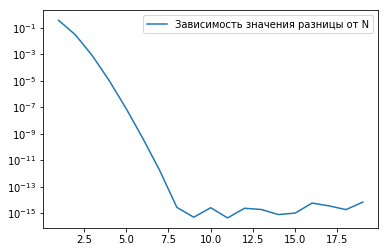

In [19]:
D=[]
I=[]
for i in range(1,20):
    xn, wn = special.roots_sh_legendre(i)
    f_solve = np.linalg.solve(np.eye(i)-1/2*wn, np.sin(np.pi*xn))
    f_real = np.sin(np.pi*xn)+2/np.pi
    d = np.linalg.norm(f_real - f_solve)
    print('Для N = ',i,'  Разность',d)
    D.append(d)
    I.append(i)
plt.plot(I,D, label="Зависимость значения разницы от N")
plt.yscale('log') 
plt.yscale('log')
plt.legend()

Видно, что при N=9 точность уже -16 степени

### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

N = 5    Разница = 0.018656017431925267
N = 6    Разница = 0.004765085737764843
N = 7    Разница = 0.0016845581321547009
N = 8    Разница = 0.0008849562879121612
N = 9    Разница = 0.0005375645619812478
N = 10    Разница = 0.00035126845088719
N = 11    Разница = 0.00024049046118891176
N = 12    Разница = 0.00017052662956150262
N = 13    Разница = 0.00012440466458064792
N = 14    Разница = 9.294523210232144e-05
N = 15    Разница = 7.081487243361819e-05
N = 16    Разница = 5.496469021388581e-05
N = 17    Разница = 4.3325664446028853e-05
N = 18    Разница = 3.453547071863148e-05
N = 19    Разница = 2.7916506404255777e-05
N = 20    Разница = 2.2846670136768998e-05
N = 21    Разница = 1.886347162743767e-05
N = 22    Разница = 1.5713227884797712e-05
N = 23    Разница = 1.3213825807938664e-05
N = 24    Разница = 1.1194216446297027e-05
N = 25    Разница = 9.3900851906388e-06
N = 26    Разница = 8.154906359825624e-06
N = 27    Разница = 6.996524734563559e-06
N = 28    Разница = 6.05396646358151

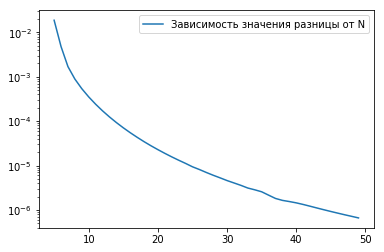

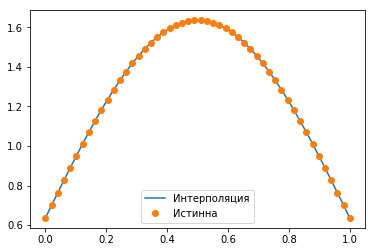

In [20]:
x = np.linspace(0, 1, 50)
D=[]
I=[]
for i in range(5,50):
    xn, wn = special.roots_sh_legendre(i)
    f_solve = np.linalg.solve(np.eye(i)-1/2*wn, np.sin(np.pi*xn))
    f_interpol = CubicSpline(xn, f_solve)
    f_real = lambda x: np.sin(np.pi*x)+2/np.pi
    d = np.linalg.norm(f_real(x) - f_interpol(x))
    print("N =", i,'   Разница =', d)
    D.append(d)
    I.append(i)
plt.plot(I,D, label="Зависимость значения разницы от N")
plt.yscale('log') 
plt.yscale('log')
plt.legend()
plt.show()
plt.plot(x, f_interpol(x), label='Интерполяция')
plt.plot(x, f_real(x), 'o', label='Истинна')
plt.legend()
plt.show()

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

N = 5    Разница реального= 2.4822727484216415e-07    Разница интерполируемого= 0.018656064888993847
N = 6    Разница реального= 1.1765510448480331e-09    Разница интерполируемого= 0.0047650853164901575
N = 7    Разница реального= 4.027475685630489e-12    Разница интерполируемого= 0.00168455813430949
N = 8    Разница реального= 7.0058503728469556e-15    Разница интерполируемого= 0.0008849562879080654
N = 9    Разница реального= 0.0    Разница интерполируемого= 0.0005375645619812478
N = 10    Разница реального= 5.632672503515322e-15    Разница интерполируемого= 0.0003512684508906341
N = 11    Разница реального= 0.0    Разница интерполируемого= 0.00024049046118891176
N = 12    Разница реального= 3.89370267511739e-15    Разница интерполируемого= 0.00017052662955914378
N = 13    Разница реального= 2.546262077003306e-15    Разница интерполируемого= 0.0001244046645821386
N = 14    Разница реального= 9.805224261780596e-16    Разница интерполируемого= 9.294523210200851e-05
N = 15    Разница ре

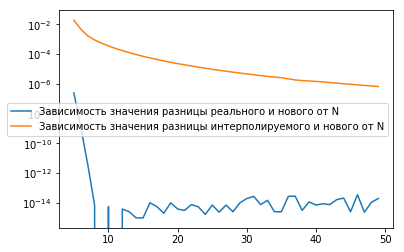

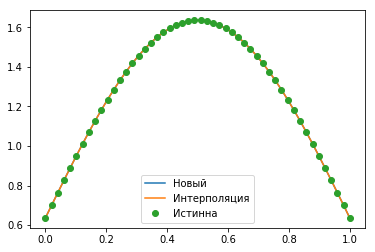

In [23]:
x = np.linspace(0, 1, 50)
D_real=[]
D_interpol=[]
I=[]
W=[]
for i in range(5,50):
    xn, wn = special.roots_sh_legendre(i)
    W.append(wn)
    f_solve = np.linalg.solve(np.eye(i)-1/2*wn, np.sin(np.pi*xn))
    f_interpol = CubicSpline(xn, f_solve)
    f_real = lambda x: np.sin(np.pi*x)+2/np.pi
    f_new = lambda x, f: np.sin(np.pi*x)+(wn @ f /2)
    d_real = np.linalg.norm(f_new(x, f_solve) - f_real(x))
    d_interpol =  np.linalg.norm(f_new(x, f_solve) - f_interpol(x))
    print("N =", i,'   Разница реального=', d_real,'   Разница интерполируемого=', d_interpol)
    D_real.append(d_real)
    D_interpol.append(d_interpol)
    I.append(i)
plt.plot(I,D_real, label="Зависимость значения разницы реального и нового от N")
plt.plot(I,D_interpol, label="Зависимость значения разницы интерполируемого и нового от N")
plt.yscale('log') 
plt.yscale('log')
plt.legend()
plt.show()
plt.plot(x, f_new(x, f_solve), label='Новый')
plt.plot(x, f_interpol(x), label='Интерполяция')
plt.plot(x, f_real(x), 'o', label='Истинна')
plt.legend()
plt.show()

Видно, что метод вычисления напрямую в непрерывной переменной x более точный чем метод c интерполяцией